In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
### Partie A - Les données
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [17]:
# Téléchargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] # N = 60 000 données
# Données d'apprentissage X
X_train = np.reshape(X_train_data,(N,784)) # vecteur image
X_train = X_train/255 # normalisation
# Données d'apprentissage Y vers une liste de taille 10
Y_train = to_categorical(Y_train_data, num_classes=10)
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)
### Partie B - Le réseau de neurones
p = 8
modele = Sequential()
# Première couche : p neurones (entrée de dimension 784 = 28x28)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))
# Deuxième couche : p neurones
modele.add(Dense(p, activation='sigmoid'))
# Couche de sortie : 1O neurones (un par chiffre)
modele.add(Dense(10, activation='softmax'))
# Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
print(modele.summary())
### Partie C - Calcul des poids par descente de gradient
modele.fit(X_train, Y_train, batch_size=32, epochs=50)
### Partie D - Résultats
resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1875/1875 [==============================] - 18s 8ms/step - loss: 2.2711 - accuracy: 0.2102
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 2.1522 - accuracy: 0.4065
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9256 - accuracy: 0.4794
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step 

In [16]:
Y_test[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Sortie réseau [7.08224491e-07 9.42439437e-01 1.48270838e-02 2.11954545e-02
 3.58067162e-04 7.74891290e-04 1.10321955e-04 1.01468759e-03
 1.87705234e-02 5.08918194e-04]
Chiffre attendu : 1
Chiffre prédit : 1


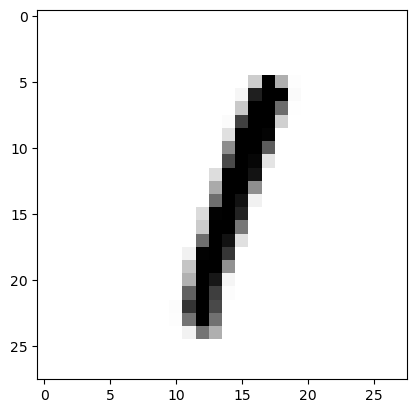

In [14]:
import matplotlib.pyplot as plt
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)
# Un exemple
i = 5 # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()